In [7]:
from plotnine import *
from plotnine.data import *
import pandas as pd

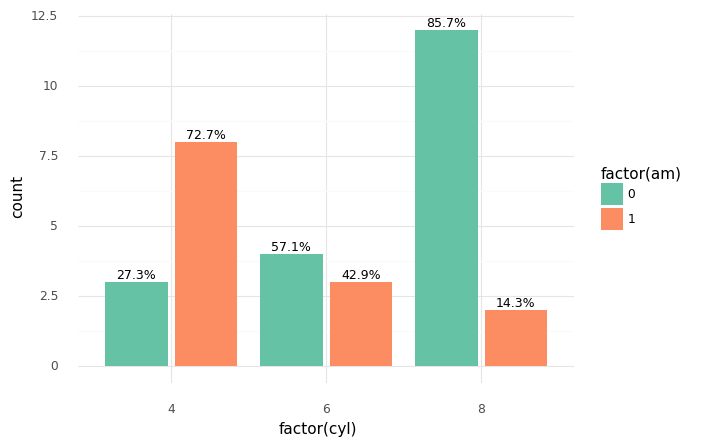

<ggplot: (147988287305)>

In [8]:
def prop_per_x(x, count):
    """
    Compute the proportion of the counts for each value of x
    """
    df = pd.DataFrame({
        'x': x,
        'count': count
    })
    prop = df['count']/df.groupby('x')['count'].transform('sum')
    return prop

(
    ggplot(mtcars, aes('factor(cyl)', fill='factor(am)'))
    + geom_bar(position='dodge2')
    + geom_text(
        aes(
            label=after_stat('prop_per_x(x, count) * 100'),
            y=stage(after_stat='count', after_scale='y+.25')
        ),
        stat='count',
        position=position_dodge2(width=0.9),
        format_string='{:.1f}%',
        size=9,
        )
    + theme_minimal()
    + scale_fill_brewer(
        type = 'qual',
        palette = 'Set2'
    )
)
